### Case Study: GIS Map Visualization

**Objective:** Visualize the speed and elevation on a map. Use Pandas to import the data and prepare the map. Geographic Information Systems (GIS) are an important technology to view spatially distributed data. The GIS maps can help to identify factors related to location.

Programming for Engineers: [Automotive Data](https://www.apmonitor.com/pds/index.php/Main/AutomotiveData)

- [Course Overview](https://apmonitor.com/che263)
- [Course Schedule](https://apmonitor.com/che263/index.php/Main/CourseSchedule)

Additional data sets and case studies are available on the [Machine Learning for Engineers course](https://apmonitor.com/pds/index.php/Main/AutomotiveMonitoring).

<img width=400px align=left src='https://apmonitor.com/pds/uploads/Main/automotive_monitoring.png'>

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import Data and View Columns

Import data, set time index, and print data columns

In [2]:
url = 'http://apmonitor.com/pds/uploads/Main/auto_trip.zip'
data = pd.read_csv(url)
data.head()

,time,Absolute load value (%),Absolute pedal position D (%),Altitude (GPS) (feet),Ambient air temperature (℉),Average fuel consumption (MPG),Average fuel consumption (total) (MPG),Average fuel consumption 10 sec (MPG),Average speed (mph),Average speed (GPS) (mph),...,Oxygen sensor 1 Wide Range Current (mA) (mA),Oxygen sensor 1 Wide Range Equivalence ratio (),Power from MAF (hp),Speed (GPS) (mph),Throttle position (%),Vehicle acceleration (g),Vehicle speed (mph),Latitude,Longitude,Unnamed: 41
0,07:50:22.160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.249749,-111.635575,NaN
1,07:50:22.266,NaN,NaN,4744.09464,NaN,NaN,NaN,NaN,NaN,2.309839,...,NaN,NaN,NaN,22.548318,NaN,NaN,NaN,40.249749,-111.635575,NaN
2,07:50:22.273,NaN,NaN,4744.09464,NaN,NaN,NaN,NaN,NaN,2.310961,...,NaN,NaN,NaN,22.548318,NaN,NaN,NaN,40.249667,-111.635543,NaN
3,07:50:22.274,NaN,NaN,4744.09464,NaN,NaN,NaN,NaN,NaN,2.311115,...,NaN,NaN,NaN,22.548318,NaN,NaN,NaN,40.249667,-111.635543,NaN
4,07:50:22.306,NaN,NaN,NaN,NaN,6.030337,40.557863,3.621411,NaN,NaN,...,NaN,NaN,13.176,NaN,NaN,NaN,NaN,40.249667,-111.635543,NaN


In [3]:
# reduce to every 100th row
data = data[::100]
len(data)

2919

In [4]:
# reset row index
data.reset_index(inplace=True,drop=True)

In [5]:
# delete column
del data['Unnamed: 41']

In [6]:
# set time index
data['time'] = pd.to_datetime(data['time'])
data = data.set_index('time')
data.sample(5)

C:\Users\bis1abt\AppData\Local\Temp\ipykernel_21932\2449213582.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time'] = pd.to_datetime(data['time'])


,Absolute load value (%),Absolute pedal position D (%),Altitude (GPS) (feet),Ambient air temperature (℉),Average fuel consumption (MPG),Average fuel consumption (total) (MPG),Average fuel consumption 10 sec (MPG),Average speed (mph),Average speed (GPS) (mph),Barometric pressure (kPa),...,MAF air flow rate (g/sec),Oxygen sensor 1 Wide Range Current (mA) (mA),Oxygen sensor 1 Wide Range Equivalence ratio (),Power from MAF (hp),Speed (GPS) (mph),Throttle position (%),Vehicle acceleration (g),Vehicle speed (mph),Latitude,Longitude
time,,,,,,,,,,,,,,,,,,,,,
2023-10-06 19:35:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.500660,NaN,...,NaN,NaN,NaN,NaN,80.887616,NaN,NaN,NaN,39.463944,-112.000540
2023-10-06 10:51:42,NaN,NaN,5813.64848,NaN,NaN,NaN,NaN,NaN,69.819859,NaN,...,NaN,NaN,NaN,NaN,77.263782,NaN,NaN,NaN,37.643244,-113.090344
2023-10-06 10:45:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30.980392,NaN,NaN,37.742433,-113.039131
2023-10-06 10:45:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.575729,NaN,...,NaN,NaN,NaN,NaN,79.880993,NaN,NaN,NaN,37.744611,-113.036989
2023-10-06 08:31:08,NaN,NaN,5206.69308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.723243,-111.820360


### Fill In Missing Data

In [7]:
# fill in NaNs - forward fill
data.fillna(method='ffill',inplace=True)
# fill in NaNs - backward fill
data.fillna(method='bfill',inplace=True)
data.describe()

,Absolute load value (%),Absolute pedal position D (%),Altitude (GPS) (feet),Ambient air temperature (℉),Average fuel consumption (MPG),Average fuel consumption (total) (MPG),Average fuel consumption 10 sec (MPG),Average speed (mph),Average speed (GPS) (mph),Barometric pressure (kPa),...,MAF air flow rate (g/sec),Oxygen sensor 1 Wide Range Current (mA) (mA),Oxygen sensor 1 Wide Range Equivalence ratio (),Power from MAF (hp),Speed (GPS) (mph),Throttle position (%),Vehicle acceleration (g),Vehicle speed (mph),Latitude,Longitude
count,2919.000000,2919.000000,2919.000000,0.0,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,33.303105,27.610140,4945.240816,NaN,36.958943,37.725977,36.954652,65.416881,37.615404,83.754711,...,21.584488,-0.014798,14.960448,25.901385,71.438917,24.179514,0.000805,70.535955,38.600450,-112.541546
std,11.839209,6.942147,949.043957,NaN,1.426529,0.584324,1.437938,10.151632,28.282874,3.062652,...,9.120191,0.287445,2.096734,10.944229,22.198231,7.278993,0.022347,22.559814,0.998320,0.588817
min,8.235294,15.000000,2463.910840,NaN,32.872647,36.667208,32.745248,17.517022,5.689695,80.000000,...,1.990000,-0.394531,13.534341,2.388000,0.000000,9.803922,-0.165846,0.000000,37.083279,-113.587583
25%,25.490196,25.000000,4560.367600,NaN,36.466475,37.160844,36.460625,66.039858,11.719539,82.000000,...,17.780000,-0.089844,14.500536,21.336000,75.630819,18.823529,-0.003821,74.564543,37.751476,-113.029035
50%,34.901961,27.000000,5078.740320,NaN,37.323258,37.766360,37.321134,68.299585,14.881227,83.000000,...,21.590000,-0.035156,14.678082,25.908000,79.321759,24.313725,0.000000,79.535513,38.602652,-112.607026
75%,43.137255,29.000000,5692.257400,NaN,38.073586,38.283437,38.076165,69.276341,70.182394,85.000000,...,26.660000,-0.011719,14.781203,31.992000,82.196226,28.627451,0.007322,80.778255,39.464409,-112.000367
max,62.352941,46.000000,6446.850600,NaN,38.448748,38.647150,38.440441,73.880289,74.656090,92.000000,...,43.470000,2.242188,29.382617,52.164000,91.199894,42.745098,0.080675,87.613338,40.249749,-111.630317


### Plot Data

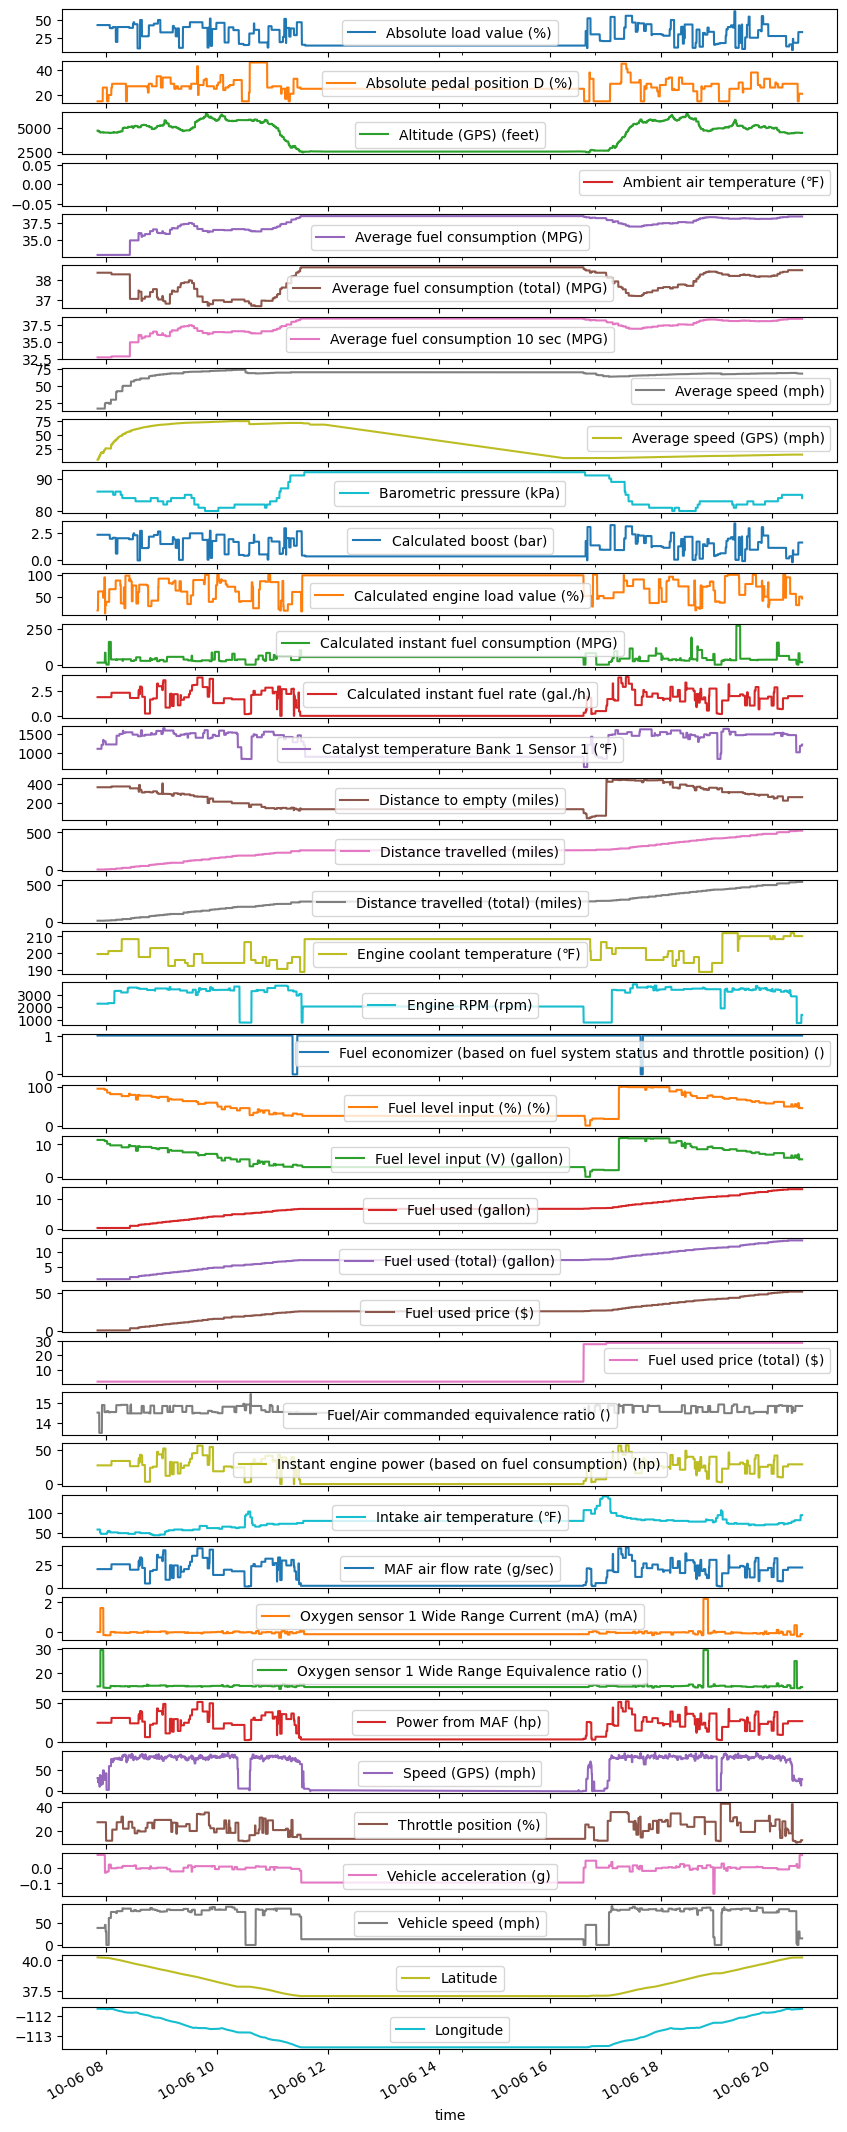

In [8]:
data.plot(subplots=True,figsize=(10,30))
plt.show()

### View GPS Points on Map

Plot the longitude and latitude on a `matplotlib` plot.

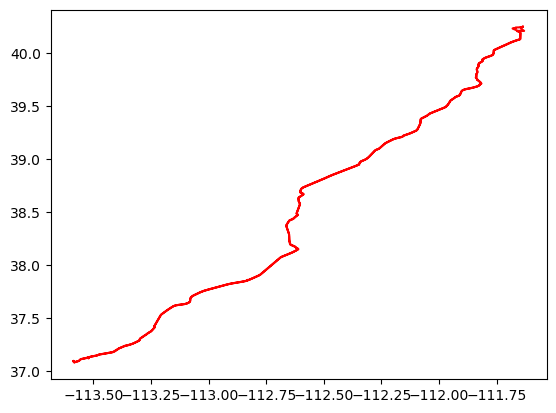

In [9]:
x = data['Longitude'].values
y = data['Latitude'].values

# plot data
plt.plot(x,y,'r-')
plt.show()

### Display GPS with Plotly Express

In [11]:
import plotly.express as px

df = px.data.carshare()
fig = px.scatter_mapbox(data, lat="Latitude", lon="Longitude", \
                        color="Vehicle speed (mph)", \
                        size="Altitude (GPS) (feet)", \
                        color_continuous_scale=px.colors.cyclical.IceFire, \
                        size_max=5, zoom=6)
fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()